In [1]:
# Reproduce your clustering experiments, but on the data after you've run dimensionality reduction on it.

In [2]:
# https://www.youtube.com/watch?v=ikt0sny_ImY
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
from sklearn.cluster import KMeans
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import scale
import sklearn.metrics as sm
from sklearn import datasets
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.datasets import load_breast_cancer
from sklearn.decomposition import PCA, FastICA
from sklearn.random_projection import SparseRandomProjection
from sklearn.feature_selection import SelectPercentile
from sklearn.mixture import GaussianMixture
%matplotlib inline

og shape:  (569L, 30L)
new shape:  (569L, 10L)
             precision    recall  f1-score   support

          0       0.93      0.83      0.87       212
          1       0.90      0.96      0.93       357

avg / total       0.91      0.91      0.91       569


             precision    recall  f1-score   support

          0       0.10      0.17      0.12       212
          1       0.07      0.04      0.05       357

avg / total       0.08      0.09      0.08       569


ARI:  0.670720647688


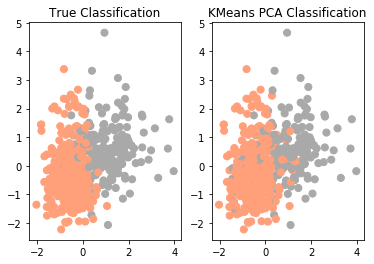

In [3]:
#################### Kmeans PCA Breastcancer ###############################

cancer = load_breast_cancer()

X = scale(cancer.data)
y = pd.DataFrame(cancer.target)
y = y.values.flatten()

print "og shape: ", X.shape
pca = PCA(n_components=10).fit(X)
transformed_data = pca.transform(X)
print "new shape: ", transformed_data.shape

clustering = KMeans(n_clusters=2, random_state = 5)
clustering.fit(transformed_data)

color_theme = np.array(['darkgray', 'lightsalmon'])

plt.subplot(1,2,1)
plt.scatter(x=X[:,0], y= X[:,1], c=color_theme[y], s=50)
plt.title('True Classification')

plt.subplot(1,2,2)
plt.scatter(x=X[:,0], y= X[:,1], c=color_theme[clustering.labels_], s=50)
plt.title('KMeans PCA Classification')

relabel = np.choose(clustering.labels_,[1,0]).astype(np.int64)
#plt.subplot(1,2,2)
#plt.scatter(x=cancer_df[0], y= cancer_df[1], c=color_theme[relabel], s=50)
#plt.title('KMeans Classification')

print classification_report(y,clustering.labels_)
print
print classification_report(y,relabel)
print 
print "ARI: ", sklearn.metrics.adjusted_rand_score(y,clustering.labels_)

og shape:  (569L, 30L)
new shape:  (569L, 10L)
             precision    recall  f1-score   support

          0       0.98      0.84      0.91       212
          1       0.91      0.99      0.95       357

avg / total       0.94      0.93      0.93       569


             precision    recall  f1-score   support

          0       0.09      0.16      0.11       212
          1       0.02      0.01      0.01       357

avg / total       0.04      0.07      0.05       569


ARI:  0.754346074466


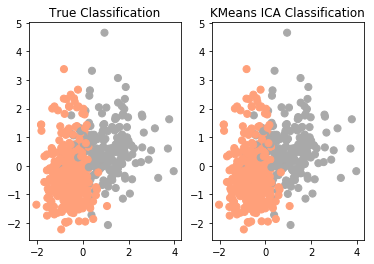

In [4]:
#################### Kmeans ICA Breastcancer ###############################

cancer = load_breast_cancer()

X = scale(cancer.data)
y = pd.DataFrame(cancer.target)
y = y.values.flatten()

print "og shape: ", X.shape
ica = FastICA(n_components=10).fit(X)
transformed_data = ica.transform(X)
print "new shape: ", transformed_data.shape




clustering = KMeans(n_clusters=2, random_state = 5)
clustering.fit(transformed_data)

color_theme = np.array(['darkgray', 'lightsalmon'])

plt.subplot(1,2,1)
plt.scatter(x=X[:,0], y= X[:,1], c=color_theme[y], s=50)
plt.title('True Classification')

plt.subplot(1,2,2)
plt.scatter(x=X[:,0], y= X[:,1], c=color_theme[y], s=50)
plt.title('KMeans ICA Classification')

relabel = np.choose(clustering.labels_,[1,0]).astype(np.int64)
#plt.subplot(1,2,2)
#plt.scatter(x=cancer_df[0], y= cancer_df[1], c=color_theme[relabel], s=50)
#plt.title('KMeans Classification')

print classification_report(y,clustering.labels_)
print
print classification_report(y,relabel)
print 
print "ARI: ", sklearn.metrics.adjusted_rand_score(y,clustering.labels_)

og shape:  (569L, 30L)
new shape:  (569L, 10L)
             precision    recall  f1-score   support

          0       0.08      0.15      0.11       212
          1       0.11      0.06      0.08       357

avg / total       0.10      0.09      0.09       569


             precision    recall  f1-score   support

          0       0.89      0.85      0.87       212
          1       0.92      0.94      0.93       357

avg / total       0.91      0.91      0.91       569


ARI:  0.659794008464


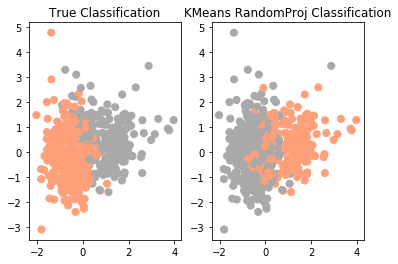

In [5]:
#################### Kmeans RandomProjection Breastcancer ###############################

cancer = load_breast_cancer()

X = scale(cancer.data)
y = pd.DataFrame(cancer.target)
y = y.values.flatten()

print "og shape: ", X.shape
sp = SparseRandomProjection(n_components = 10)
transformed_data = sp.fit_transform(X)
print "new shape: ", transformed_data.shape

clustering = KMeans(n_clusters=2, random_state = 5)
clustering.fit(transformed_data)

color_theme = np.array(['darkgray', 'lightsalmon'])

plt.subplot(1,2,1)
plt.scatter(x=X[:,0], y= X[:,4], c=color_theme[y], s=50)
plt.title('True Classification')

plt.subplot(1,2,2)
plt.scatter(x=X[:,0], y= X[:,4], c=color_theme[clustering.labels_], s=50)
plt.title('KMeans RandomProj Classification')

relabel = np.choose(clustering.labels_,[1,0]).astype(np.int64)
#plt.subplot(1,2,2)
#plt.scatter(x=X[:,0], y= X[:,4], c=color_theme[relabel], s=50)
#plt.title('KMeans RandomProj Classification')

print classification_report(y,clustering.labels_)
print
print classification_report(y,relabel)
print 
print "ARI: ", sklearn.metrics.adjusted_rand_score(y,clustering.labels_)

og shape:  (569L, 30L)
<type 'numpy.ndarray'>
<type 'numpy.ndarray'>
new shape:  (569L, 10L)
(569L,)
(569L,)
             precision    recall  f1-score   support

          0       0.12      0.22      0.15       212
          1       0.01      0.00      0.00       357

avg / total       0.05      0.08      0.06       569


             precision    recall  f1-score   support

          0       0.99      0.78      0.87       212
          1       0.88      1.00      0.94       357

avg / total       0.92      0.92      0.91       569


ARI:  0.687080111081


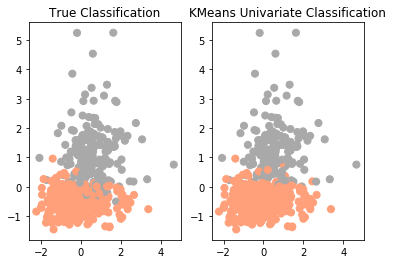

In [6]:
#################### Kmeans Univariate Breastcancer ###############################

cancer = load_breast_cancer()

X = scale(cancer.data)
y = pd.DataFrame(cancer.target)
y = y.values.flatten()

print "og shape: ", X.shape
print type(X)
print type(y)
select = SelectPercentile(percentile=33)
select.fit(X, y)
transformed_data = select.transform(X)
print "new shape: ", transformed_data.shape


clustering = KMeans(n_clusters=2, random_state = 5)
clustering.fit(transformed_data)


color_theme = np.array(['darkgray', 'lightsalmon'])
print X[:,1].shape
print y.shape
plt.subplot(1,2,1)
plt.scatter(x=X[:,1], y= X[:,3], c=color_theme[y], s=50)
plt.title('True Classification')

#plt.subplot(1,2,2)
#plt.scatter(x=cancer_df[0], y= cancer_df[1], c=color_theme[clustering.labels_], s=50)
#plt.title('KMeans Classification')

relabel = np.choose(clustering.labels_,[1,0]).astype(np.int64)
plt.subplot(1,2,2)
plt.scatter(x=X[:,1], y= X[:,3], c=color_theme[relabel], s=50)
plt.title('KMeans Univariate Classification')

print classification_report(y,clustering.labels_)
print
print classification_report(y,relabel)
print
print "ARI: ", sklearn.metrics.adjusted_rand_score(y,clustering.labels_)


og shape:  (2310L, 19L)
<type 'numpy.ndarray'>
<type 'numpy.ndarray'>
new shape:  (2310L, 8L)
(2310L,)
             precision    recall  f1-score   support

          0       0.00      0.00      0.00       330
          1       0.93      1.00      0.97       330
          2       0.14      0.22      0.17       330
          3       0.14      0.01      0.01       330
          4       0.00      0.01      0.01       330
          5       0.00      0.00      0.00       330
          6       0.00      0.00      0.00       330

avg / total       0.17      0.18      0.17      2310


             precision    recall  f1-score   support

          0       0.00      0.00      0.00       330
          1       0.93      1.00      0.97       330
          2       0.14      0.22      0.17       330
          3       0.14      0.01      0.01       330
          4       0.00      0.01      0.01       330
          5       0.00      0.00      0.00       330
          6       0.00      0.00      0.00  

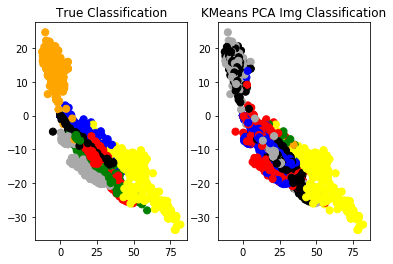

In [7]:
#################### Kmeans PCA Image ###############################

image = pd.read_csv('C:/Users/443966/github/7641_ML/A3 - Unsupervised Learning and Dimensionality Reduction/datasets/image_segmentation_1.csv')

X = image[image.columns.difference(['CLASS'])].values
y = image['CLASS']
y = y.values.flatten() -1

print "og shape: ", X.shape
print type(X)
print type(y)
pca = PCA(n_components=8).fit(X)
transformed_data = pca.transform(X)
print "new shape: ", transformed_data.shape

clustering = KMeans(n_clusters=7, random_state = 5)
clustering.fit(transformed_data)

color_theme = np.array(['darkgray', 'yellow', 'blue', 'green', 'black', 'red', 'orange'])

print y.shape
plt.subplot(1,2,1)
plt.scatter(x=X[:,0], y= X[:,1], c=color_theme[y], s=50)
plt.title('True Classification')

plt.subplot(1,2,2)
plt.scatter(x=X[:,0], y= X[:,1], c=color_theme[clustering.labels_], s=50)
plt.title('KMeans PCA Img Classification')

relabel = np.choose(clustering.labels_,[0,1,2,3,4,5,6]).astype(np.int64)
#plt.subplot(1,2,2)
#plt.scatter(x=cancer_df[0], y= cancer_df[1], c=color_theme[relabel], s=50)
#plt.title('KMeans Classification')

print classification_report(y,clustering.labels_)
print
print classification_report(y,relabel)
print 
print "ARI: ", sklearn.metrics.adjusted_rand_score(y,clustering.labels_)

og shape:  (2310L, 19L)
<type 'numpy.ndarray'>
<type 'numpy.ndarray'>


C:\ProgramData\Anaconda2\lib\site-packages\sklearn\decomposition\fastica_.py:118: UserWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn('FastICA did not converge. Consider increasing '


new shape:  (2310L, 8L)
(2310L,)
             precision    recall  f1-score   support

          0       0.00      0.00      0.00       330
          1       1.00      0.91      0.95       330
          2       0.32      0.08      0.13       330
          3       0.25      0.01      0.01       330
          4       0.01      0.01      0.01       330
          5       0.00      0.00      0.00       330
          6       0.00      0.01      0.00       330

avg / total       0.23      0.15      0.16      2310


             precision    recall  f1-score   support

          0       0.00      0.00      0.00       330
          1       1.00      0.91      0.95       330
          2       0.32      0.08      0.13       330
          3       0.25      0.01      0.01       330
          4       0.01      0.01      0.01       330
          5       0.00      0.00      0.00       330
          6       0.00      0.01      0.00       330

avg / total       0.23      0.15      0.16      2310


ARI: 

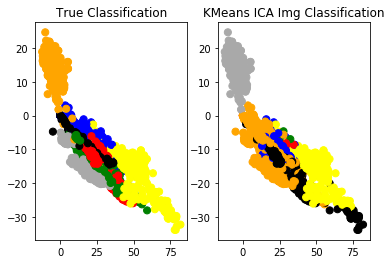

In [8]:
#################### Kmeans ICA Image ###############################

image = pd.read_csv('C:/Users/443966/github/7641_ML/A3 - Unsupervised Learning and Dimensionality Reduction/datasets/image_segmentation_1.csv')

X = image[image.columns.difference(['CLASS'])].values
y = image['CLASS']
y = y.values.flatten() -1

print "og shape: ", X.shape
print type(X)
print type(y)
ica = FastICA(n_components=8).fit(X)
transformed_data = ica.transform(X)
print "new shape: ", transformed_data.shape

clustering = KMeans(n_clusters=7, random_state = 5)
clustering.fit(transformed_data)

color_theme = np.array(['darkgray', 'yellow', 'blue', 'green', 'black', 'red', 'orange'])

print y.shape
plt.subplot(1,2,1)
plt.scatter(x=X[:,0], y= X[:,1], c=color_theme[y], s=50)
plt.title('True Classification')

plt.subplot(1,2,2)
plt.scatter(x=X[:,0], y= X[:,1], c=color_theme[clustering.labels_], s=50)
plt.title('KMeans ICA Img Classification')

relabel = np.choose(clustering.labels_,[0,1,2,3,4,5,6]).astype(np.int64)
#plt.subplot(1,2,2)
#plt.scatter(x=cancer_df[0], y= cancer_df[1], c=color_theme[relabel], s=50)
#plt.title('KMeans Classification')

print classification_report(y,clustering.labels_)
print
print classification_report(y,relabel)
print 
print "ARI: ", sklearn.metrics.adjusted_rand_score(y,clustering.labels_)

og shape:  (2310L, 19L)
<type 'numpy.ndarray'>
<type 'numpy.ndarray'>
new shape:  (2310L, 8L)
(2310L,)
             precision    recall  f1-score   support

          0       0.07      0.13      0.09       330
          1       0.00      0.00      0.00       330
          2       0.00      0.00      0.00       330
          3       0.04      0.07      0.05       330
          4       0.00      0.00      0.00       330
          5       0.18      0.32      0.23       330
          6       0.00      0.00      0.00       330

avg / total       0.04      0.07      0.05      2310


             precision    recall  f1-score   support

          0       0.07      0.13      0.09       330
          1       0.00      0.00      0.00       330
          2       0.00      0.00      0.00       330
          3       0.04      0.07      0.05       330
          4       0.00      0.00      0.00       330
          5       0.18      0.32      0.23       330
          6       0.00      0.00      0.00  

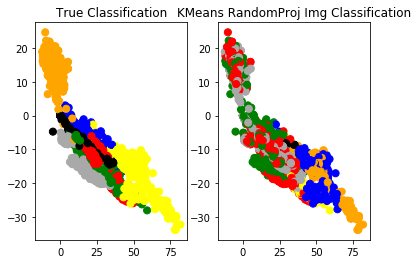

In [9]:
#################### Kmeans RandomProjection Image ###############################

image = pd.read_csv('C:/Users/443966/github/7641_ML/A3 - Unsupervised Learning and Dimensionality Reduction/datasets/image_segmentation_1.csv')

X = image[image.columns.difference(['CLASS'])].values
y = image['CLASS']
y = y.values.flatten() -1

print "og shape: ", X.shape
print type(X)
print type(y)
sp = SparseRandomProjection(n_components = 8)
transformed_data = sp.fit_transform(X)
print "new shape: ", transformed_data.shape

clustering = KMeans(n_clusters=7, random_state = 5)
clustering.fit(transformed_data)

color_theme = np.array(['darkgray', 'yellow', 'blue', 'green', 'black', 'red', 'orange'])

print y.shape
plt.subplot(1,2,1)
plt.scatter(x=X[:,0], y= X[:,1], c=color_theme[y], s=50)
plt.title('True Classification')

plt.subplot(1,2,2)
plt.scatter(x=X[:,0], y= X[:,1], c=color_theme[clustering.labels_], s=50)
plt.title('KMeans RandomProj Img Classification')

relabel = np.choose(clustering.labels_,[0,1,2,3,4,5,6]).astype(np.int64)
#plt.subplot(1,2,2)
#plt.scatter(x=cancer_df[0], y= cancer_df[1], c=color_theme[relabel], s=50)
#plt.title('KMeans Classification')

print classification_report(y,clustering.labels_)
print
print classification_report(y,relabel)
print 
print "ARI: ", sklearn.metrics.adjusted_rand_score(y,clustering.labels_)

og shape:  (2310L, 19L)
<type 'numpy.ndarray'>
<type 'numpy.ndarray'>
new shape:  (2310L, 9L)
(2310L,)
             precision    recall  f1-score   support

          0       0.00      0.00      0.00       330
          1       0.00      0.00      0.00       330
          2       0.14      0.10      0.12       330
          3       0.02      0.04      0.03       330
          4       0.00      0.00      0.00       330
          5       0.96      0.98      0.97       330
          6       0.00      0.00      0.00       330

avg / total       0.16      0.16      0.16      2310




C:\ProgramData\Anaconda2\lib\site-packages\sklearn\feature_selection\univariate_selection.py:113: UserWarning: Features [12] are constant.
  UserWarning)
C:\ProgramData\Anaconda2\lib\site-packages\sklearn\feature_selection\univariate_selection.py:114: RuntimeWarning: invalid value encountered in divide
  f = msb / msw


             precision    recall  f1-score   support

          0       0.00      0.00      0.00       330
          1       0.00      0.00      0.00       330
          2       0.14      0.10      0.12       330
          3       0.02      0.04      0.03       330
          4       0.00      0.00      0.00       330
          5       0.96      0.98      0.97       330
          6       0.00      0.00      0.00       330

avg / total       0.16      0.16      0.16      2310


ARI:  0.552766518207


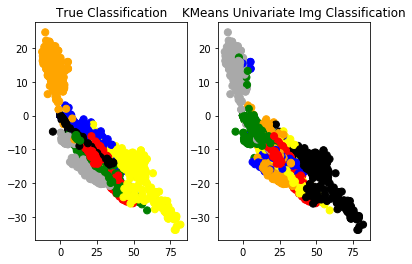

In [10]:
#################### Kmeans Univariate Image ###############################

image = pd.read_csv('C:/Users/443966/github/7641_ML/A3 - Unsupervised Learning and Dimensionality Reduction/datasets/image_segmentation_1.csv')

X = image[image.columns.difference(['CLASS'])].values
y = image['CLASS']
y = y.values.flatten() -1

print "og shape: ", X.shape
print type(X)
print type(y)
select = SelectPercentile(percentile=50)
select.fit(X, y)
transformed_data = select.transform(X)
print "new shape: ", transformed_data.shape

clustering = KMeans(n_clusters=7, random_state = 5)
clustering.fit(transformed_data)

color_theme = np.array(['darkgray', 'yellow', 'blue', 'green', 'black', 'red', 'orange'])

print y.shape
plt.subplot(1,2,1)
plt.scatter(x=X[:,0], y= X[:,1], c=color_theme[y], s=50)
plt.title('True Classification')

plt.subplot(1,2,2)
plt.scatter(x=X[:,0], y= X[:,1], c=color_theme[clustering.labels_], s=50)
plt.title('KMeans Univariate Img Classification')

relabel = np.choose(clustering.labels_,[0,1,2,3,4,5,6]).astype(np.int64)
#plt.subplot(1,2,2)
#plt.scatter(x=cancer_df[0], y= cancer_df[1], c=color_theme[relabel], s=50)
#plt.title('KMeans Classification')

print classification_report(y,clustering.labels_)
print
print classification_report(y,relabel)
print 
print "ARI: ", sklearn.metrics.adjusted_rand_score(y,clustering.labels_)

og shape:  (569L, 30L)
new shape:  (569L, 10L)
             precision    recall  f1-score   support

          0       0.27      0.52      0.36       212
          1       0.39      0.18      0.25       357

avg / total       0.35      0.31      0.29       569


             precision    recall  f1-score   support

          0       0.61      0.48      0.54       212
          1       0.73      0.82      0.77       357

avg / total       0.68      0.69      0.68       569


ARI:  0.137080375763


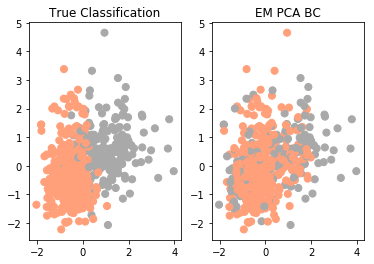

In [11]:
#################### EM PCA Breastcancer ###############################

cancer = load_breast_cancer()

X = scale(cancer.data)
y = pd.DataFrame(cancer.target)
y = y.values.flatten()

print "og shape: ", X.shape
pca = PCA(n_components=10).fit(X)
transformed_data = pca.transform(X)
print "new shape: ", transformed_data.shape

#clustering = KMeans(n_clusters=2, random_state = 5)
#clustering.fit(transformed_data)

gmm=GaussianMixture(n_components=2, covariance_type="full").fit(transformed_data)
labels = gmm.predict(transformed_data)

color_theme = np.array(['darkgray', 'lightsalmon'])

plt.subplot(1,2,1)
plt.scatter(x=X[:,0], y= X[:,1], c=color_theme[y], s=50)
plt.title('True Classification')

#plt.subplot(1,2,2)
#plt.scatter(x=X[:,0], y= X[:,1], c=color_theme[labels], s=50)
#plt.title('EM PCA BC')

relabel = np.choose(labels,[1,0]).astype(np.int64)
plt.subplot(1,2,2)
plt.scatter(x=X[:,0], y= X[:,1], c=color_theme[relabel], s=50)
plt.title('EM PCA BC')

print classification_report(y,labels)
print
print classification_report(y,relabel)
print 
print "ARI: ", sklearn.metrics.adjusted_rand_score(y,relabel)

og shape:  (569L, 30L)
new shape:  (569L, 10L)
             precision    recall  f1-score   support

          0       0.97      0.90      0.93       212
          1       0.94      0.98      0.96       357

avg / total       0.95      0.95      0.95       569


             precision    recall  f1-score   support

          0       0.06      0.10      0.08       212
          1       0.03      0.02      0.02       357

avg / total       0.04      0.05      0.04       569


ARI:  0.811383886115


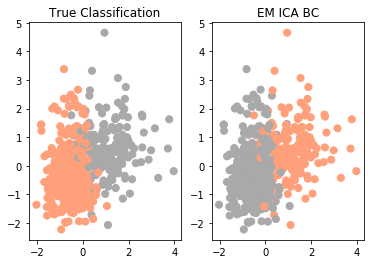

In [12]:
#################### EM ICA Breastcancer ###############################

cancer = load_breast_cancer()

X = scale(cancer.data)
y = pd.DataFrame(cancer.target)
y = y.values.flatten()

print "og shape: ", X.shape
ica = FastICA(n_components=10).fit(X)
transformed_data = ica.transform(X)
print "new shape: ", transformed_data.shape

#clustering = KMeans(n_clusters=2, random_state = 5)
#clustering.fit(transformed_data)

gmm=GaussianMixture(n_components=2, covariance_type="full").fit(transformed_data)
labels = gmm.predict(transformed_data)

color_theme = np.array(['darkgray', 'lightsalmon'])

plt.subplot(1,2,1)
plt.scatter(x=X[:,0], y= X[:,1], c=color_theme[y], s=50)
plt.title('True Classification')

#plt.subplot(1,2,2)
#plt.scatter(x=X[:,0], y= X[:,1], c=color_theme[labels], s=50)
#plt.title('EM PCA BC')

relabel = np.choose(labels,[1,0]).astype(np.int64)
plt.subplot(1,2,2)
plt.scatter(x=X[:,0], y= X[:,1], c=color_theme[relabel], s=50)
plt.title('EM ICA BC')

print classification_report(y,labels)
print
print classification_report(y,relabel)
print 
print "ARI: ", sklearn.metrics.adjusted_rand_score(y,labels)

og shape:  (569L, 30L)
new shape:  (569L, 10L)
             precision    recall  f1-score   support

          0       0.76      0.67      0.72       212
          1       0.82      0.87      0.85       357

avg / total       0.80      0.80      0.80       569


             precision    recall  f1-score   support

          0       0.18      0.33      0.23       212
          1       0.24      0.13      0.17       357

avg / total       0.22      0.20      0.19       569


ARI:  0.353383774047


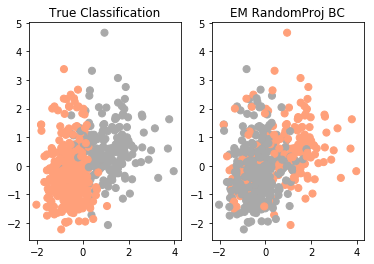

In [13]:
#################### EM RandomProj Breastcancer ###############################

cancer = load_breast_cancer()

X = scale(cancer.data)
y = pd.DataFrame(cancer.target)
y = y.values.flatten()

print "og shape: ", X.shape
sp = SparseRandomProjection(n_components = 10)
transformed_data = sp.fit_transform(X)
print "new shape: ", transformed_data.shape

#clustering = KMeans(n_clusters=2, random_state = 5)
#clustering.fit(transformed_data)

gmm=GaussianMixture(n_components=2, covariance_type="full").fit(transformed_data)
labels = gmm.predict(transformed_data)

color_theme = np.array(['darkgray', 'lightsalmon'])

plt.subplot(1,2,1)
plt.scatter(x=X[:,0], y= X[:,1], c=color_theme[y], s=50)
plt.title('True Classification')

#plt.subplot(1,2,2)
#plt.scatter(x=X[:,0], y= X[:,1], c=color_theme[labels], s=50)
#plt.title('EM PCA BC')

relabel = np.choose(labels,[1,0]).astype(np.int64)
plt.subplot(1,2,2)
plt.scatter(x=X[:,0], y= X[:,1], c=color_theme[relabel], s=50)
plt.title('EM RandomProj BC')

print classification_report(y,labels)
print
print classification_report(y,relabel)
print 
print "ARI: ", sklearn.metrics.adjusted_rand_score(y,labels)

og shape:  (569L, 30L)
new shape:  (569L, 15L)
             precision    recall  f1-score   support

          0       0.05      0.09      0.07       212
          1       0.07      0.04      0.05       357

avg / total       0.06      0.06      0.06       569


             precision    recall  f1-score   support

          0       0.93      0.91      0.92       212
          1       0.95      0.96      0.95       357

avg / total       0.94      0.94      0.94       569


ARI:  0.773859144728


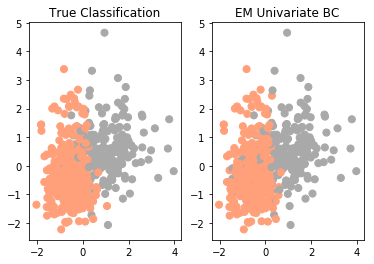

In [14]:
#################### EM Univariate Breastcancer ###############################

cancer = load_breast_cancer()

X = scale(cancer.data)
y = pd.DataFrame(cancer.target)
y = y.values.flatten()

print "og shape: ", X.shape
select = SelectPercentile(percentile=50)
select.fit(X, y)
transformed_data = select.transform(X)
print "new shape: ", transformed_data.shape

#clustering = KMeans(n_clusters=2, random_state = 5)
#clustering.fit(transformed_data)

gmm=GaussianMixture(n_components=2, covariance_type="full").fit(transformed_data)
labels = gmm.predict(transformed_data)

color_theme = np.array(['darkgray', 'lightsalmon'])

plt.subplot(1,2,1)
plt.scatter(x=X[:,0], y= X[:,1], c=color_theme[y], s=50)
plt.title('True Classification')

#plt.subplot(1,2,2)
#plt.scatter(x=X[:,0], y= X[:,1], c=color_theme[labels], s=50)
#plt.title('EM PCA BC')

relabel = np.choose(labels,[1,0]).astype(np.int64)
plt.subplot(1,2,2)
plt.scatter(x=X[:,0], y= X[:,1], c=color_theme[relabel], s=50)
plt.title('EM Univariate BC')

print classification_report(y,labels)
print
print classification_report(y,relabel)
print 
print "ARI: ", sklearn.metrics.adjusted_rand_score(y,labels)

og shape:  (2310L, 19L)
<type 'numpy.ndarray'>
<type 'numpy.ndarray'>
new shape:  (2310L, 8L)
(2310L,)
             precision    recall  f1-score   support

          0       0.48      0.96      0.64       330
          1       0.00      0.00      0.00       330
          2       0.00      0.00      0.00       330
          3       0.00      0.00      0.00       330
          4       0.00      0.00      0.00       330
          5       0.46      0.75      0.57       330
          6       0.00      0.00      0.00       330

avg / total       0.13      0.25      0.17      2310


             precision    recall  f1-score   support

          0       0.48      0.96      0.64       330
          1       0.00      0.00      0.00       330
          2       0.00      0.00      0.00       330
          3       0.00      0.00      0.00       330
          4       0.00      0.00      0.00       330
          5       0.46      0.75      0.57       330
          6       0.00      0.00      0.00  

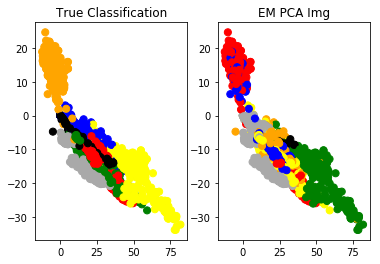

In [15]:
#################### EM PCA Image ###############################

image = pd.read_csv('C:/Users/443966/github/7641_ML/A3 - Unsupervised Learning and Dimensionality Reduction/datasets/image_segmentation_1.csv')

X = image[image.columns.difference(['CLASS'])].values
y = image['CLASS']
y = y.values.flatten() -1

print "og shape: ", X.shape
print type(X)
print type(y)
pca = PCA(n_components=8).fit(X)
transformed_data = pca.transform(X)
print "new shape: ", transformed_data.shape

#clustering = KMeans(n_clusters=7, random_state = 5)
#clustering.fit(transformed_data)

gmm=GaussianMixture(n_components=7, covariance_type="full").fit(transformed_data)
labels = gmm.predict(transformed_data)

color_theme = np.array(['darkgray', 'yellow', 'blue', 'green', 'black', 'red', 'orange'])

print y.shape
plt.subplot(1,2,1)
plt.scatter(x=X[:,0], y= X[:,1], c=color_theme[y], s=50)
plt.title('True Classification')

plt.subplot(1,2,2)
plt.scatter(x=X[:,0], y= X[:,1], c=color_theme[labels], s=50)
plt.title('EM PCA Img')

relabel = np.choose(labels,[0,1,2,3,4,5,6]).astype(np.int64)
#plt.subplot(1,2,2)
#plt.scatter(x=cancer_df[0], y= cancer_df[1], c=color_theme[relabel], s=50)
#plt.title('KMeans Classification')

print classification_report(y,labels)
print
print classification_report(y,relabel)
print 
print "ARI: ", sklearn.metrics.adjusted_rand_score(y,labels)

og shape:  (2310L, 19L)
<type 'numpy.ndarray'>
<type 'numpy.ndarray'>
new shape:  (2310L, 8L)
(2310L,)
             precision    recall  f1-score   support

          0       0.00      0.00      0.00       330
          1       0.00      0.00      0.00       330
          2       0.00      0.00      0.00       330
          3       0.00      0.00      0.00       330
          4       0.27      0.39      0.32       330
          5       0.00      0.00      0.00       330
          6       0.00      0.00      0.00       330

avg / total       0.04      0.06      0.05      2310


             precision    recall  f1-score   support

          0       0.00      0.00      0.00       330
          1       0.00      0.00      0.00       330
          2       0.00      0.00      0.00       330
          3       0.00      0.00      0.00       330
          4       0.27      0.39      0.32       330
          5       0.00      0.00      0.00       330
          6       0.00      0.00      0.00  

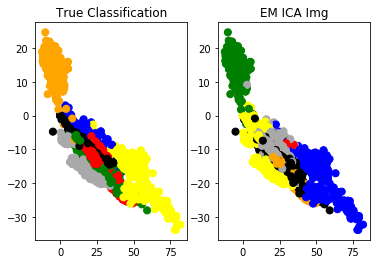

In [16]:
#################### EM ICA Image ###############################

image = pd.read_csv('C:/Users/443966/github/7641_ML/A3 - Unsupervised Learning and Dimensionality Reduction/datasets/image_segmentation_1.csv')

X = image[image.columns.difference(['CLASS'])].values
y = image['CLASS']
y = y.values.flatten() -1

print "og shape: ", X.shape
print type(X)
print type(y)
ica = FastICA(n_components=8).fit(X)
transformed_data = ica.transform(X)
print "new shape: ", transformed_data.shape

#clustering = KMeans(n_clusters=7, random_state = 5)
#clustering.fit(transformed_data)

gmm=GaussianMixture(n_components=7, covariance_type="full").fit(transformed_data)
labels = gmm.predict(transformed_data)

color_theme = np.array(['darkgray', 'yellow', 'blue', 'green', 'black', 'red', 'orange'])

print y.shape
plt.subplot(1,2,1)
plt.scatter(x=X[:,0], y= X[:,1], c=color_theme[y], s=50)
plt.title('True Classification')

plt.subplot(1,2,2)
plt.scatter(x=X[:,0], y= X[:,1], c=color_theme[labels], s=50)
plt.title('EM ICA Img')

relabel = np.choose(labels,[0,1,2,3,4,5,6]).astype(np.int64)
#plt.subplot(1,2,2)
#plt.scatter(x=cancer_df[0], y= cancer_df[1], c=color_theme[relabel], s=50)
#plt.title('KMeans Classification')

print classification_report(y,labels)
print
print classification_report(y,relabel)
print 
print "ARI: ", sklearn.metrics.adjusted_rand_score(y,labels)

og shape:  (2310L, 19L)
<type 'numpy.ndarray'>
<type 'numpy.ndarray'>
new shape:  (2310L, 8L)
(2310L,)
             precision    recall  f1-score   support

          0       0.00      0.00      0.00       330
          1       0.00      0.00      0.00       330
          2       0.39      0.12      0.19       330
          3       0.02      0.02      0.02       330
          4       0.33      0.34      0.33       330
          5       0.41      0.77      0.53       330
          6       0.00      0.00      0.00       330

avg / total       0.16      0.18      0.15      2310


             precision    recall  f1-score   support

          0       0.00      0.00      0.00       330
          1       0.00      0.00      0.00       330
          2       0.39      0.12      0.19       330
          3       0.02      0.02      0.02       330
          4       0.33      0.34      0.33       330
          5       0.41      0.77      0.53       330
          6       0.00      0.00      0.00  

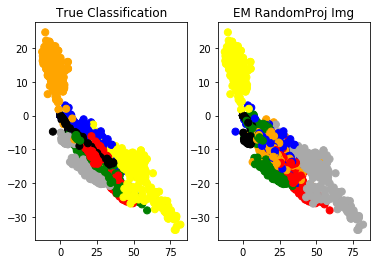

In [17]:
#################### EM RandomProj Image ###############################

image = pd.read_csv('C:/Users/443966/github/7641_ML/A3 - Unsupervised Learning and Dimensionality Reduction/datasets/image_segmentation_1.csv')

X = image[image.columns.difference(['CLASS'])].values
y = image['CLASS']
y = y.values.flatten() -1

print "og shape: ", X.shape
print type(X)
print type(y)
sp = SparseRandomProjection(n_components = 8)
transformed_data = sp.fit_transform(X)
print "new shape: ", transformed_data.shape

#clustering = KMeans(n_clusters=7, random_state = 5)
#clustering.fit(transformed_data)

gmm=GaussianMixture(n_components=7, covariance_type="full").fit(transformed_data)
labels = gmm.predict(transformed_data)

color_theme = np.array(['darkgray', 'yellow', 'blue', 'green', 'black', 'red', 'orange'])

print y.shape
plt.subplot(1,2,1)
plt.scatter(x=X[:,0], y= X[:,1], c=color_theme[y], s=50)
plt.title('True Classification')

plt.subplot(1,2,2)
plt.scatter(x=X[:,0], y= X[:,1], c=color_theme[labels], s=50)
plt.title('EM RandomProj Img')

relabel = np.choose(labels,[0,1,2,3,4,5,6]).astype(np.int64)
#plt.subplot(1,2,2)
#plt.scatter(x=cancer_df[0], y= cancer_df[1], c=color_theme[relabel], s=50)
#plt.title('KMeans Classification')

print classification_report(y,labels)
print
print classification_report(y,relabel)
print 
print "ARI: ", sklearn.metrics.adjusted_rand_score(y,labels)

og shape:  (2310L, 19L)
<type 'numpy.ndarray'>
<type 'numpy.ndarray'>
new shape:  (2310L, 9L)
(2310L,)
             precision    recall  f1-score   support

          0       0.00      0.00      0.00       330
          1       0.00      0.00      0.00       330
          2       0.00      0.00      0.00       330
          3       0.00      0.00      0.00       330
          4       0.00      0.00      0.00       330
          5       0.10      0.19      0.13       330
          6       0.00      0.00      0.00       330

avg / total       0.01      0.03      0.02      2310


             precision    recall  f1-score   support

          0       0.00      0.00      0.00       330
          1       0.00      0.00      0.00       330
          2       0.00      0.00      0.00       330
          3       0.00      0.00      0.00       330
          4       0.00      0.00      0.00       330
          5       0.10      0.19      0.13       330
          6       0.00      0.00      0.00  

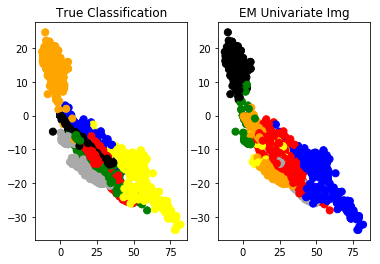

In [18]:
#################### EM Univariate Image ###############################

image = pd.read_csv('C:/Users/443966/github/7641_ML/A3 - Unsupervised Learning and Dimensionality Reduction/datasets/image_segmentation_1.csv')

X = image[image.columns.difference(['CLASS'])].values
y = image['CLASS']
y = y.values.flatten() -1

print "og shape: ", X.shape
print type(X)
print type(y)
select = SelectPercentile(percentile=50)
select.fit(X, y)
transformed_data = select.transform(X)
print "new shape: ", transformed_data.shape

#clustering = KMeans(n_clusters=7, random_state = 5)
#clustering.fit(transformed_data)

gmm=GaussianMixture(n_components=7, covariance_type="full").fit(transformed_data)
labels = gmm.predict(transformed_data)

color_theme = np.array(['darkgray', 'yellow', 'blue', 'green', 'black', 'red', 'orange'])

print y.shape
plt.subplot(1,2,1)
plt.scatter(x=X[:,0], y= X[:,1], c=color_theme[y], s=50)
plt.title('True Classification')

plt.subplot(1,2,2)
plt.scatter(x=X[:,0], y= X[:,1], c=color_theme[labels], s=50)
plt.title('EM Univariate Img')

relabel = np.choose(labels,[0,1,2,3,4,5,6]).astype(np.int64)
#plt.subplot(1,2,2)
#plt.scatter(x=cancer_df[0], y= cancer_df[1], c=color_theme[relabel], s=50)
#plt.title('KMeans Classification')

print classification_report(y,labels)
print
print classification_report(y,relabel)
print 
print "ARI: ", sklearn.metrics.adjusted_rand_score(y,labels)